# Compare rfu values for single well vs multiple well assay


## Get data from multiple well


In [1]:
# %load kinase_multiple_well_spectra_experiment


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from matplotlib import gridspec
from glob import glob


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


# In[15]:

filenames = ['2017-11-20 15-48-06_plate_1.xml',
            '2017-11-20 16-17-59_plate_1.xml',
            '2017-11-20 16-41-35_plate_1.xml',
            '2017-11-20 16-59-09_plate_1.xml',
            '2017-11-20 17-19-31_plate_1.xml',
            '2017-11-20 17-37-37_plate_1.xml',
            '2017-11-20 17-58-04_plate_1.xml',
            '2017-11-20 18-16-02_plate_1.xml',
            '2017-11-20 18-35-42_plate_1.xml',
            '2017-11-20 18-54-33_plate_1.xml',
            '2017-11-20 19-12-49_plate_1.xml',
            '2017-11-20 19-31-32_plate_1.xml']

datapath = 'infinite_results/single_wv'


# In[16]:


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])


# In[17]:

reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)
    
label = '280_480_TOP_100'


### Plot data at all wavelengths

In [2]:
### extract data for single well, break up into each ligand to mirror multiple well data extraction 

# get single wv protein data from column 1
measurements_single_prot = list()
prot_well_dict = {'Bos_A1':0, 'Bos_iso_B1':23, 'Gef':24, 'Erl':47, 'Pon':48, 'Lap':71, 'Paz':72, 'Axi':95}
for key, value in prot_well_dict.items():
    well = value
    measurements = [list(reads[i][label].values())[well] for i in range(nreads)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_single_prot.append(measurements)
    
# get single wv buffer data from column 2
measurements_single_buff = list()
buff_well_dict = {'Bos_A1':1, 'Bos_iso_B1':22, 'Gef':25, 'Erl':46, 'Pon':49, 'Lap':70, 'Paz':73, 'Axi':94}
for key, value in buff_well_dict.items():
    well = value
    measurements = [list(reads[i][label].values())[well] for i in range(nreads)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_single_buff.append(measurements)

# get protein spectra data from column 5
measurements_single_spectra_prot = list()
prot_well_dict = {'Bos_A1':4, 'Bos_iso_B1':19, 'Gef':28, 'Erl':43, 'Pon':52, 'Lap':67, 'Paz':76, 'Axi':91}
for key, value in prot_well_dict.items():
    well = value
    measurements = [list(reads[i][label].values())[well] for i in range(nreads)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_single_spectra_prot.append(measurements)
    
# get buffer spectra data
measurements_single_spectra_buff = list()
buff_spect_well_dict = {'Bos_A1':5, 'Bos_iso_B1':18, 'Gef':29, 'Erl':42, 'Pon':53, 'Lap':66, 'Paz':77, 'Axi':90}
for key, value in buff_spect_well_dict.items():
    well = value
    measurements = [list(reads[i][label].values())[well] for i in range(nreads)]
    for i in range(len(measurements)):
        measurements = list([x if x != 'OVER' else 0 for x in measurements])
        measurements = [float(i) for i in measurements]
    measurements_single_spectra_buff.append(measurements)

### Plot data at 480 nm

# Loglog plot

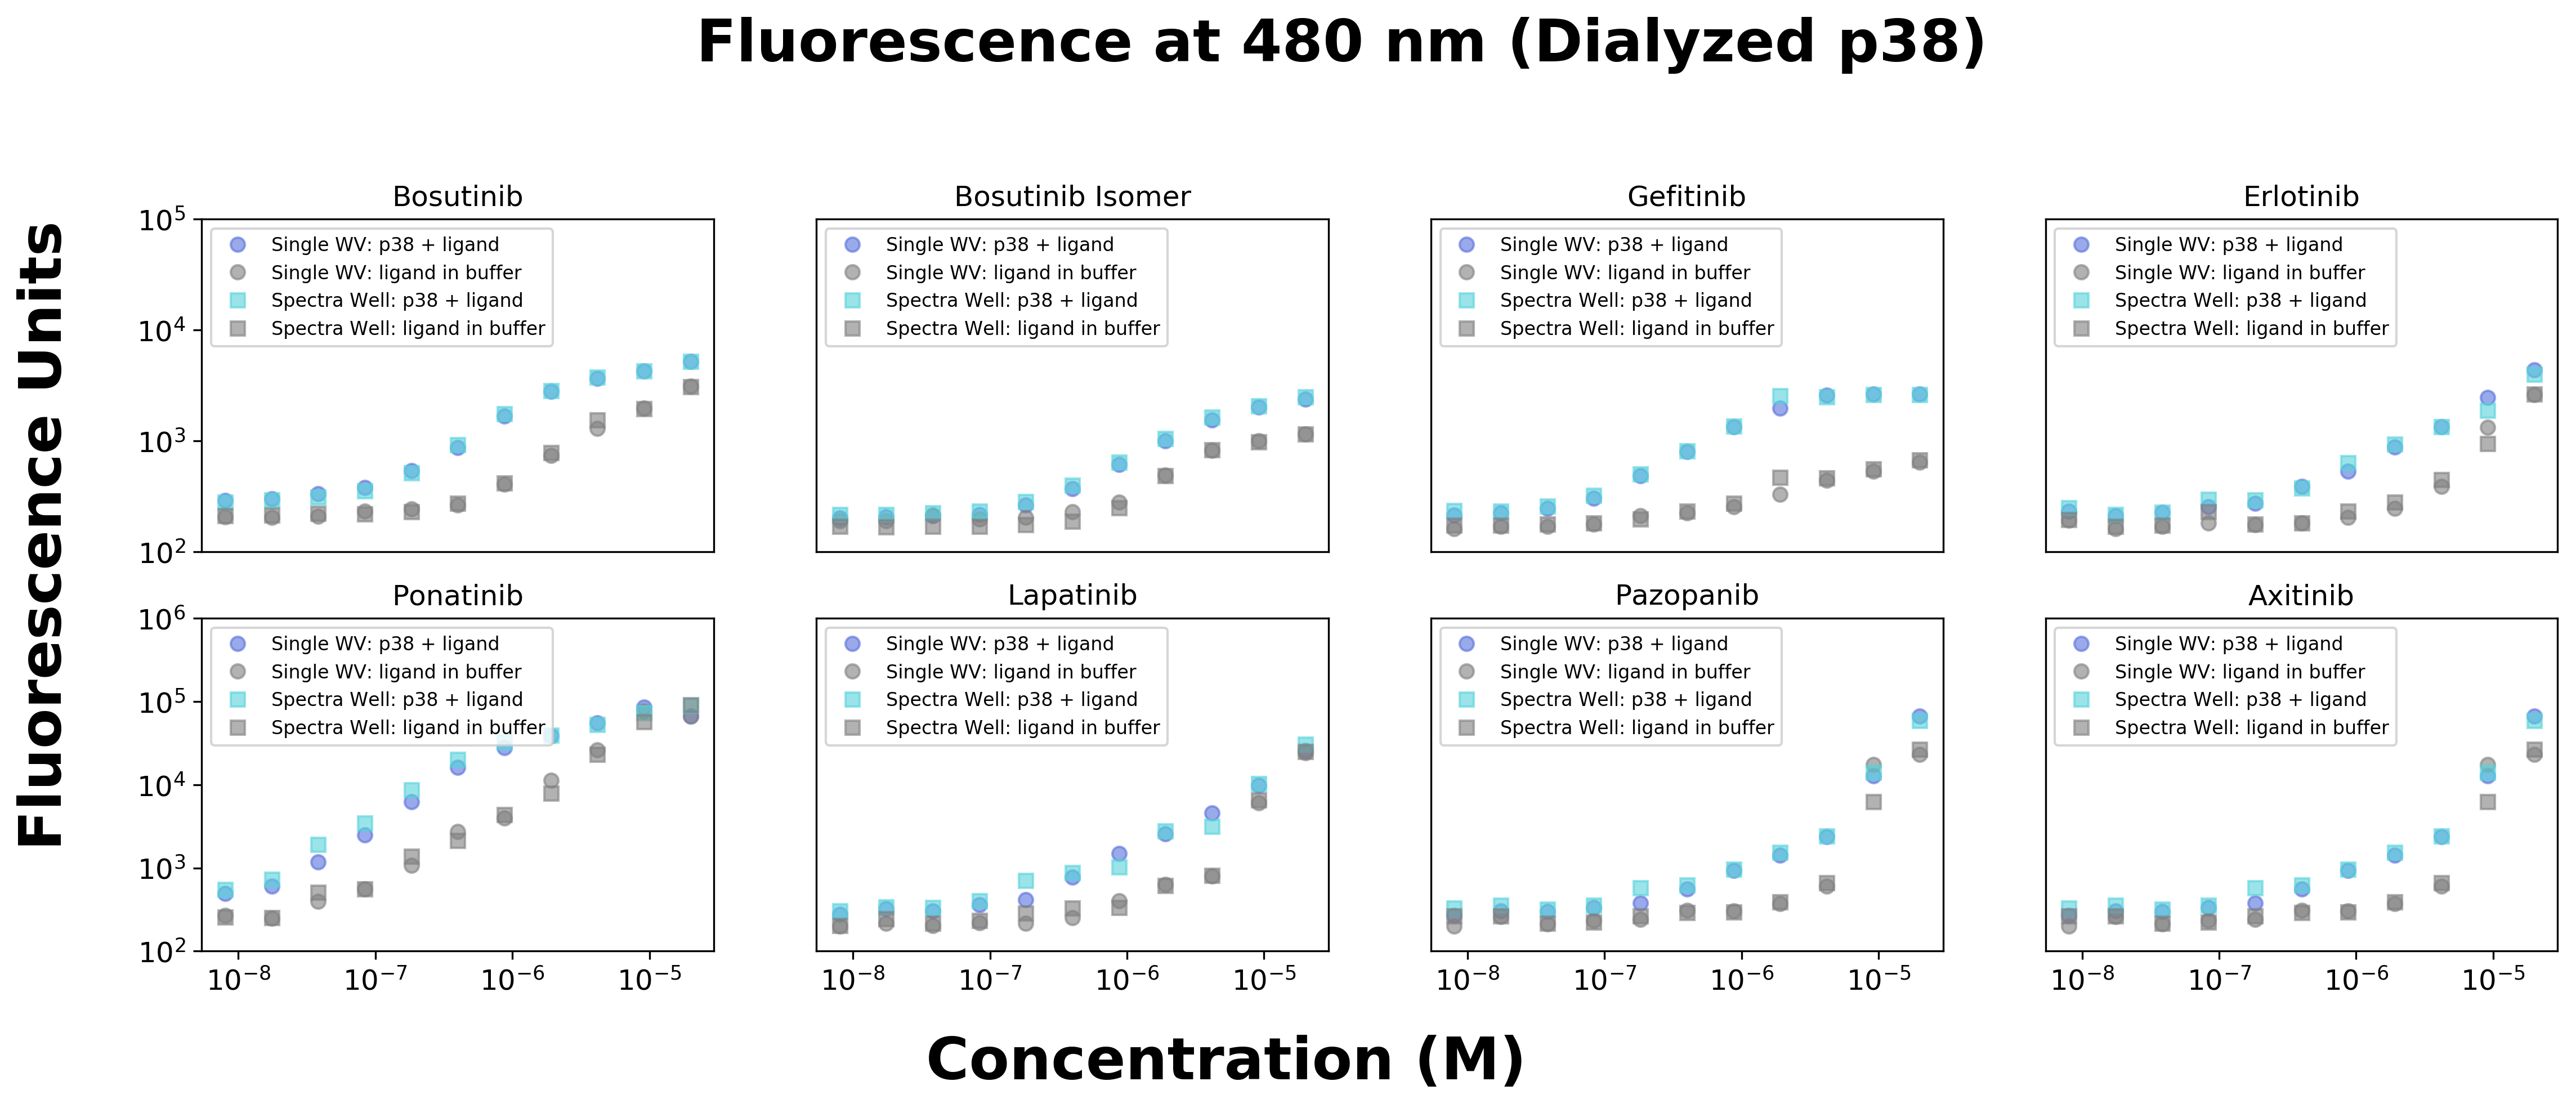

In [3]:
## make 4 plots, one for each ligand at 480 nm Em
current_palette = sns.color_palette("hls",8)

wavelength = '480'
protein_color = current_palette[5]
protein_color_spectra = current_palette[4]
buffer_color = 'gray'

fig = plt.figure(figsize=(18,12), dpi=300)
plt.suptitle('Fluorescence at 480 nm (Dialyzed p38)', fontsize=25, fontweight='bold')
ax1 = fig.add_subplot(4,4,1)

# Plot fluorescence
plt.loglog(concentrations, measurements_single_prot[0], c=protein_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_buff[0], c=buffer_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_prot[0], c=protein_color_spectra, marker='s', linestyle='None', markersize=6, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_buff[0], c=buffer_color, marker='s', linestyle='None', markersize=6, alpha=0.6)
ax1.set_ylim(10**2, 100000)

ax1.yaxis.set_tick_params(labelsize=12)
ax1.xaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Single WV: p38 + ligand', 'Single WV: ligand in buffer', 'Spectra Well: p38 + ligand', 'Spectra Well: ligand in buffer'], loc=2, prop={'size': 8})
plt.title('Bosutinib')

ax1 = fig.add_subplot(4,4,2)


# Plot fluorescence
plt.loglog(concentrations, measurements_single_prot[1], c=protein_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_buff[1], c=buffer_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_prot[1], c=protein_color_spectra, marker='s', linestyle='None', markersize=6, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_buff[1], c=buffer_color, marker='s', linestyle='None', markersize=6, alpha=0.6)
ax1.set_ylim(10**2, 1000000)

ax1.yaxis.set_tick_params(labelsize=8)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Single WV: p38 + ligand', 'Single WV: ligand in buffer', 'Spectra Well: p38 + ligand', 'Spectra Well: ligand in buffer'], loc=2, prop={'size': 8})
plt.title('Bosutinib Isomer')

ax1 = fig.add_subplot(4,4,3)

# Plot fluorescence
plt.loglog(concentrations, measurements_single_prot[2], c=protein_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_buff[2], c=buffer_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_prot[2], c=protein_color_spectra, marker='s', linestyle='None', markersize=6, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_buff[2], c=buffer_color, marker='s', linestyle='None', markersize=6, alpha=0.6)
ax1.set_ylim(10**2, 1000000)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()

plt.legend(['Single WV: p38 + ligand', 'Single WV: ligand in buffer', 'Spectra Well: p38 + ligand', 'Spectra Well: ligand in buffer'], loc=2, prop={'size': 8})
plt.title('Gefitinib')
    

# Plot fluorescence
ax1 = fig.add_subplot(4,4,4)
plt.loglog(concentrations, measurements_single_prot[3], c=protein_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_buff[3], c=buffer_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_prot[3], c=protein_color_spectra, marker='s', linestyle='None', markersize=6, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_buff[3], c=buffer_color, marker='s', linestyle='None', markersize=6, alpha=0.6)
ax1.set_ylim(10**2, 1000000)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()

plt.legend(['Single WV: p38 + ligand', 'Single WV: ligand in buffer', 'Spectra Well: p38 + ligand', 'Spectra Well: ligand in buffer'], loc=2, prop={'size': 8})
plt.title('Erlotinib')

# Plot fluorescence
ax1 = fig.add_subplot(4,4,5)
plt.loglog(concentrations, measurements_single_prot[4], c=protein_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_buff[4], c=buffer_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_prot[4], c=protein_color_spectra, marker='s', linestyle='None', markersize=6, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_buff[4], c=buffer_color, marker='s', linestyle='None', markersize=6, alpha=0.6)
ax1.set_ylim(10**2, 1000000)

ax1.yaxis.set_tick_params(labelsize=12)
ax1.xaxis.set_tick_params(labelsize=12)
plt.minorticks_off()
plt.legend(['Single WV: p38 + ligand', 'Single WV: ligand in buffer', 'Spectra Well: p38 + ligand', 'Spectra Well: ligand in buffer'], loc=2, prop={'size': 8})
plt.title('Ponatinib')
    
axis = plt.gca()
plt.ylabel('Fluorescence Units', fontsize=25, fontweight='bold')
axis.yaxis.set_label_coords(-0.25,1.25)
plt.xlabel('Concentration (M)', fontsize=25, fontweight='bold')
axis.xaxis.set_label_coords(2,-0.25)

ax1= fig.add_subplot(4,4,6)
plt.loglog(concentrations, measurements_single_prot[5], c=protein_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_buff[5], c=buffer_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_prot[5], c=protein_color_spectra, marker='s', linestyle='None', markersize=6, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_buff[5], c=buffer_color, marker='s', linestyle='None', markersize=6, alpha=0.6)
ax1.set_ylim(10**2, 1000000)

ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Single WV: p38 + ligand', 'Single WV: ligand in buffer', 'Spectra Well: p38 + ligand', 'Spectra Well: ligand in buffer'], loc=2, prop={'size': 8})
plt.title('Lapatinib')

ax1= fig.add_subplot(4,4,7)
plt.loglog(concentrations, measurements_single_prot[6], c=protein_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_buff[6], c=buffer_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_prot[6], c=protein_color_spectra, marker='s', linestyle='None', markersize=6, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_buff[6], c=buffer_color, marker='s', linestyle='None', markersize=6, alpha=0.6)
ax1.set_ylim(10**2, 1000000)

ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Single WV: p38 + ligand', 'Single WV: ligand in buffer', 'Spectra Well: p38 + ligand', 'Spectra Well: ligand in buffer'], loc=2, prop={'size': 8})
plt.title('Pazopanib')

ax1= fig.add_subplot(4,4,8)
plt.loglog(concentrations, measurements_single_prot[6], c=protein_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_buff[6], c=buffer_color, marker='.', linestyle='None', markersize=12, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_prot[6], c=protein_color_spectra, marker='s', linestyle='None', markersize=6, alpha=0.6)
plt.loglog(concentrations, measurements_single_spectra_buff[6], c=buffer_color, marker='s', linestyle='None', markersize=6, alpha=0.6)
ax1.set_ylim(10**2, 1000000)

ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['Single WV: p38 + ligand', 'Single WV: ligand in buffer', 'Spectra Well: p38 + ligand', 'Spectra Well: ligand in buffer'], loc=2, prop={'size': 8})
plt.title('Axitinib')


fig.savefig('20190220_rfu_comparison_multi_vs_single_MI_p38_dialyzed_logx_%s.pdf' % wavelength, dpi=300)